In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import warnings

In [2]:
df=pd.read_csv('data.csv')
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...,...
1088,1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [3]:
for col in df:
    print(df[col])
    print(df[col].unique())

0          0
1          1
2          2
3          3
4          4
        ... 
1088    1088
1089    1089
1090    1090
1091    1091
1092    1092
Name: Unnamed: 0, Length: 1093, dtype: int64
[   0    1    2 ... 1090 1091 1092]
0        7.4
1        7.8
2        6.7
3        8.6
4       12.4
        ... 
1088    18.1
1089    17.8
1090    13.9
1091    16.3
1092    16.3
Name: T, Length: 1093, dtype: float64
[ 7.4  7.8  6.7  8.6 12.4 16.  13.4 14.3 12.7 11.9 12.2 12.3 13.7 14.9
 15.  16.3 18.7 14.6 14.7 14.8 17.4 18.1 18.3 16.4 16.9 19.3 17.2 17.7
 20.4 18.2 19.  22.6 22.5 24.  23.8 23.  24.6 27.1 26.1 23.6 23.2 24.7
 25.6 25.7 25.1 29.5 29.2 31.1 29.8 28.2 28.3 29.3 30.5 28.  29.9 31.4
 29.7 32.8 34.1 30.9 32.9 30.6 36.2 36.8 37.7 35.6 33.6 31.9 32.4 34.2
 35.1 30.3 30.4 33.  31.  31.2 33.9 31.6 31.8 31.7 26.8 29.1 28.5 30.
 29.  32.2 28.4 28.1 27.4 30.1 27.7 32.1 32.  30.2 29.6 28.7 26.3 28.6
 28.9 27.9 29.4 27.5 26.6 25.  24.8 24.1 24.3 22.4 20.9 20.1 18.9 19.1
 17.8 17.6 17.  18.  21.1 21

Looking at the values

In [4]:
for col in df:
    print(col,' :',df[col].isna().sum())

Unnamed: 0  : 0
T  : 0
TM  : 0
Tm  : 0
SLP  : 0
H  : 0
VV  : 0
V  : 0
VM  : 0
PM 2.5  : 1


We can conclude that there is only one Na value in PM 2.5 column, well replae it with the mean

In [5]:
df['PM 2.5']=df['PM 2.5'].replace(np.nan,np.mean(df['PM 2.5']))

In [6]:
for col in df:
    print(col,' :',df[col].isna().sum())

Unnamed: 0  : 0
T  : 0
TM  : 0
Tm  : 0
SLP  : 0
H  : 0
VV  : 0
V  : 0
VM  : 0
PM 2.5  : 0


There are no NaN values

In [7]:
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...,...
1088,1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [8]:
Y=['Healthy' if df['PM 2.5'].iloc[i]<150 else 'Unhealthy' for i in range(len(df))]

In [9]:
Y=pd.DataFrame(Y,columns=['AQI'])
Y

,AQI
0,Unhealthy
1,Unhealthy
2,Unhealthy
3,Unhealthy
4,Unhealthy
...,...
1088,Unhealthy
1089,Unhealthy
1090,Unhealthy
1091,Unhealthy


In [10]:
X=df.drop(columns=['PM 2.5','Unnamed: 0'])

In [11]:
X

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5


In [12]:
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...,...
1088,1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [13]:
df.corr()

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
Unnamed: 0,1.000000,0.135411,0.089989,0.073136,-0.031749,-0.127880,0.280463,0.026891,0.011577,0.040423
T,0.135411,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.630705
TM,0.089989,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.567378
Tm,0.073136,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673415
SLP,-0.031749,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.622410
H,-0.127880,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.137802
VV,0.280463,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573864
V,0.026891,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268498
VM,0.011577,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215813
PM 2.5,0.040423,-0.630705,-0.567378,-0.673415,0.622410,0.137802,-0.573864,-0.268498,-0.215813,1.000000


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
df.columns
df=df.drop(columns=["Unnamed: 0"])

In [16]:
# box plot using Plotly Express
fig = px.box(df, title='Boxplot of Air Quality Data')

fig.show()


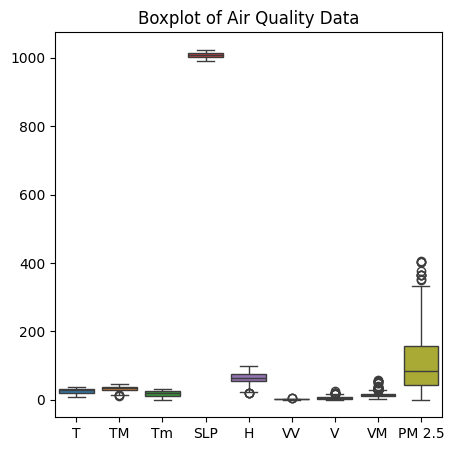

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.title('Boxplot of Air Quality Data')
plt.show()

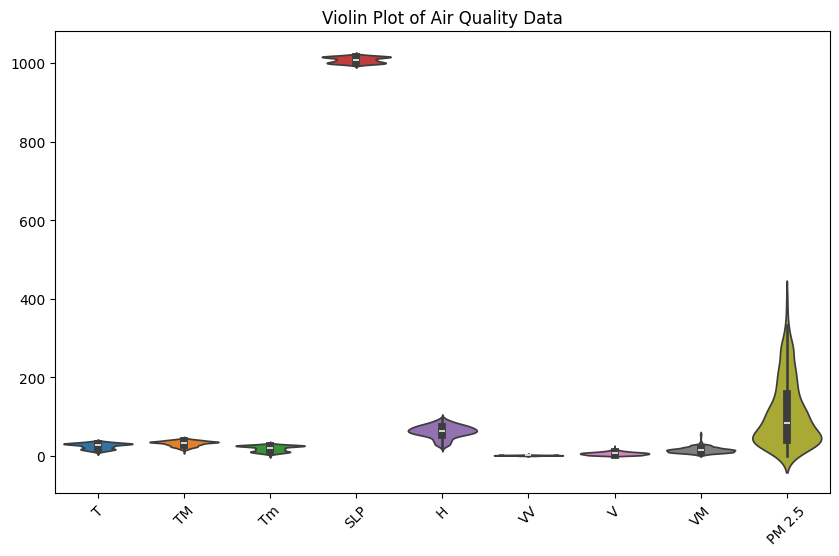

In [18]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.title('Violin Plot of Air Quality Data')
plt.xticks(rotation=45)
plt.show()

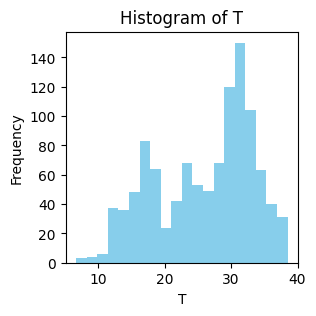

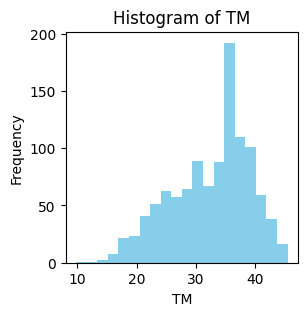

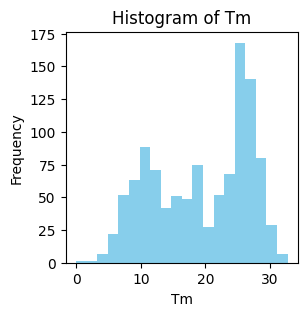

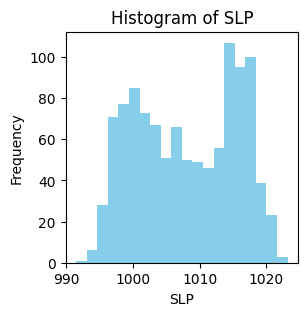

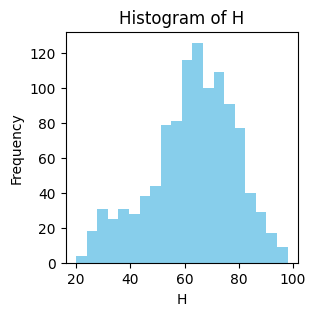

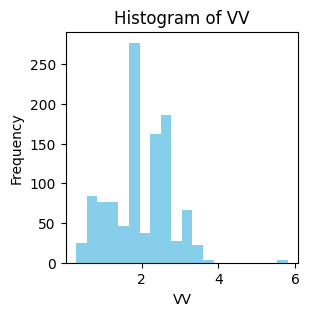

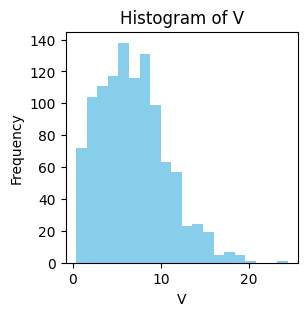

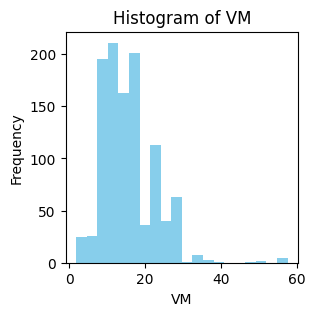

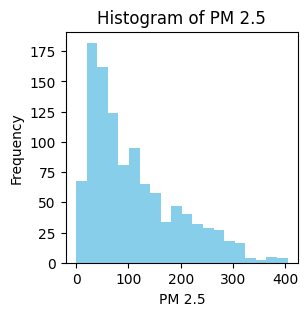

In [20]:
for column in df.columns:
    plt.figure(figsize=(3,3))
    plt.hist(df[column], bins=20, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


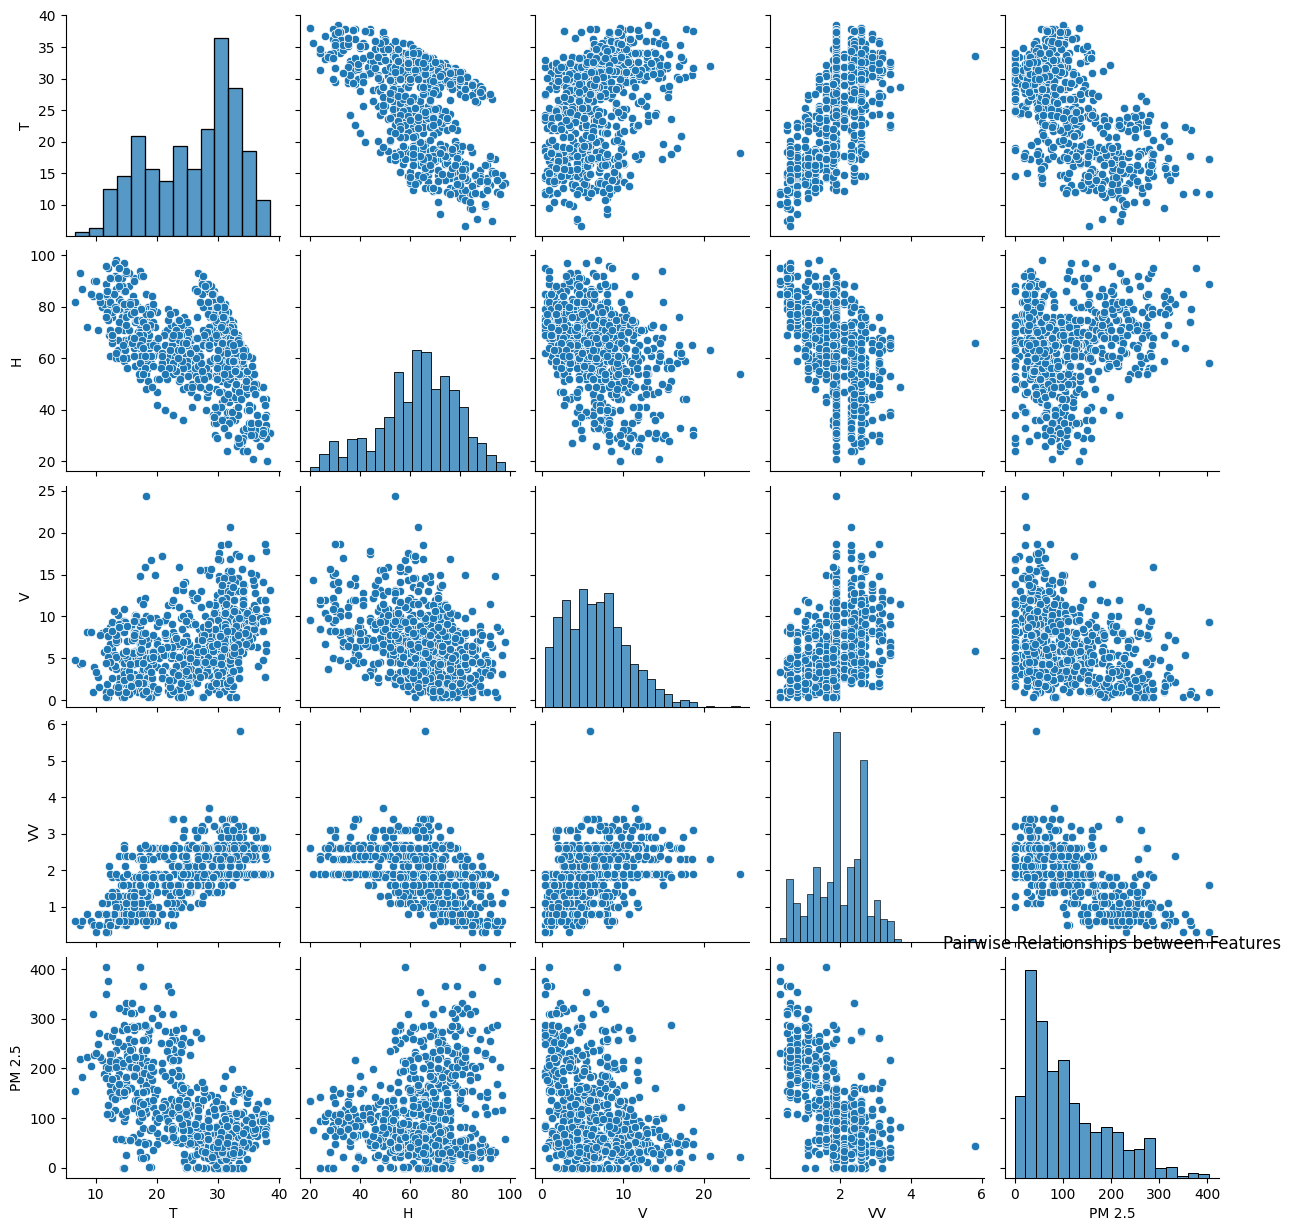

In [21]:
# Pairplot: Pairwise relationships between features
sns.pairplot(df[['T', 'H', 'V', 'VV', 'PM 2.5']],markers=['o','s','D'])
plt.title('Pairwise Relationships between Features')
plt.show()

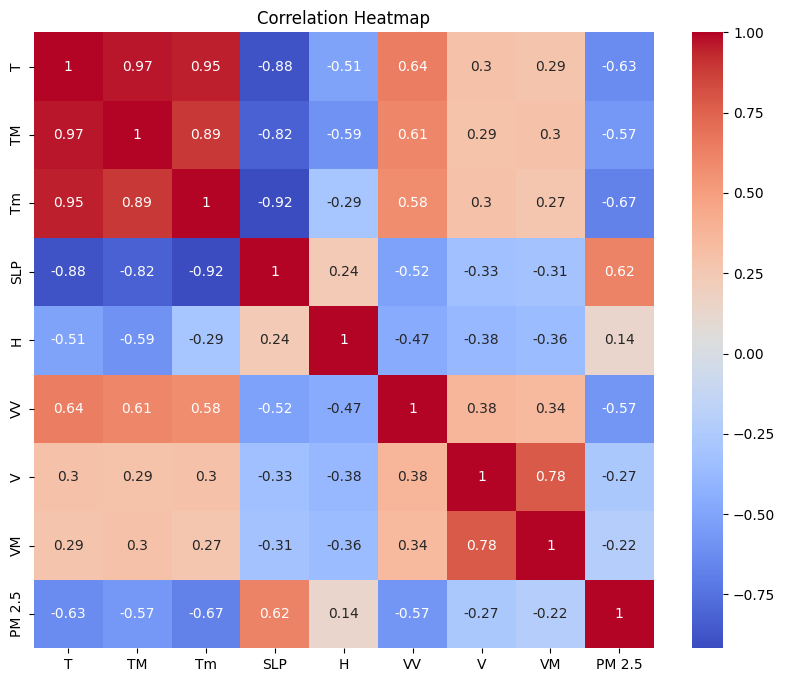

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
